Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns   
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

Loading the Data set.

In [2]:
df = pd.read_csv("Dataset.csv")
df

,Unnamed: 0,AirFlowRate,DS18B20sen1_temperatureC,DS18B20sen2_temperatureC,ct_curr,ct_power,ct_volt,time,timestamp,BME280_HUMIDI,BME280_TEMP,temperature
0,0,0.56249,9.5625,17.0625,7.632,1717.69995,229.30000,0 days 00:00:00,2024-05-15 13:30:00.000,41.872580,43.204799,16.0
1,1,1.02559,9.5625,17.1250,7.597,1708.90002,229.30000,0 days 00:00:46.750000,2024-05-15 13:30:46.750,42.127048,43.079669,16.0
2,2,1.46180,9.5625,17.0625,7.683,1730.09998,229.50000,0 days 00:01:33.500000,2024-05-15 13:31:33.500,42.249997,43.024747,16.0
3,3,1.34875,9.5625,17.1250,7.628,1717.90002,229.50000,0 days 00:02:20.250000,2024-05-15 13:32:20.250,42.248148,43.027283,16.0
4,4,1.54852,9.5625,17.0625,7.607,1711.00000,229.39999,0 days 00:03:07,2024-05-15 13:33:07.000,42.366430,42.965117,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3574,0.00000,22.0625,23.3750,0.000,0.00000,232.80000,0 days 01:33:06.704000,2024-05-31 17:48:06.704,55.243160,37.600000,26.0
3575,3575,0.00000,22.5625,23.6875,0.000,0.00000,232.89999,0 days 01:33:25.578000,2024-05-31 17:48:25.578,56.885740,36.930000,26.0
3576,3576,0.00000,23.0000,24.1250,0.000,0.00000,233.00000,0 days 01:33:44.452000,2024-05-31 17:48:44.452,57.664060,36.770000,26.0
3577,3577,0.06978,23.3125,24.3125,0.000,0.00000,233.00000,0 days 01:34:03.326000,2024-05-31 17:49:03.326,57.103520,37.010000,26.0


Consists of 12 columns with 3579 datarows.

Understanding the dataset.

In [3]:
df.head()

,Unnamed: 0,AirFlowRate,DS18B20sen1_temperatureC,DS18B20sen2_temperatureC,ct_curr,ct_power,ct_volt,time,timestamp,BME280_HUMIDI,BME280_TEMP,temperature
0,0,0.56249,9.5625,17.0625,7.632,1717.69995,229.30000,0 days 00:00:00,2024-05-15 13:30:00.000,41.872580,43.204799,16.0
1,1,1.02559,9.5625,17.1250,7.597,1708.90002,229.30000,0 days 00:00:46.750000,2024-05-15 13:30:46.750,42.127048,43.079669,16.0
2,2,1.46180,9.5625,17.0625,7.683,1730.09998,229.50000,0 days 00:01:33.500000,2024-05-15 13:31:33.500,42.249997,43.024747,16.0
3,3,1.34875,9.5625,17.1250,7.628,1717.90002,229.50000,0 days 00:02:20.250000,2024-05-15 13:32:20.250,42.248148,43.027283,16.0
4,4,1.54852,9.5625,17.0625,7.607,1711.00000,229.39999,0 days 00:03:07,2024-05-15 13:33:07.000,42.366430,42.965117,16.0


In [4]:
df.tail()

,Unnamed: 0,AirFlowRate,DS18B20sen1_temperatureC,DS18B20sen2_temperatureC,ct_curr,ct_power,ct_volt,time,timestamp,BME280_HUMIDI,BME280_TEMP,temperature
3574,3574,0.00000,22.0625,23.3750,0.0,0.0,232.80000,0 days 01:33:06.704000,2024-05-31 17:48:06.704,55.24316,37.60,26.0
3575,3575,0.00000,22.5625,23.6875,0.0,0.0,232.89999,0 days 01:33:25.578000,2024-05-31 17:48:25.578,56.88574,36.93,26.0
3576,3576,0.00000,23.0000,24.1250,0.0,0.0,233.00000,0 days 01:33:44.452000,2024-05-31 17:48:44.452,57.66406,36.77,26.0
3577,3577,0.06978,23.3125,24.3125,0.0,0.0,233.00000,0 days 01:34:03.326000,2024-05-31 17:49:03.326,57.10352,37.01,26.0
3578,3578,0.10362,23.6250,24.5000,0.0,0.0,233.10001,0 days 01:34:22.200000,2024-05-31 17:49:22.200,57.37891,36.80,26.0


Giving normal names to the technical names.

In [5]:
df.rename(columns={'DS18B20sen1_temperatureC' : 'Vapor Temperature', 'DS18B20sen2_temperatureC' : 'Liquid Temperature', 'ct_curr' : 'Current','ct_power' : 'Power', 'ct_volt': 'Voltage', 'BME280_HUMIDI': 'Outdoor Humidity', 'BME280_TEMP': 'Outdoor Temperature', 'temperature': 'Indoor Temperature'}, inplace=True)
df.head()

,Unnamed: 0,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,time,timestamp,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
0,0,0.56249,9.5625,17.0625,7.632,1717.69995,229.30000,0 days 00:00:00,2024-05-15 13:30:00.000,41.872580,43.204799,16.0
1,1,1.02559,9.5625,17.1250,7.597,1708.90002,229.30000,0 days 00:00:46.750000,2024-05-15 13:30:46.750,42.127048,43.079669,16.0
2,2,1.46180,9.5625,17.0625,7.683,1730.09998,229.50000,0 days 00:01:33.500000,2024-05-15 13:31:33.500,42.249997,43.024747,16.0
3,3,1.34875,9.5625,17.1250,7.628,1717.90002,229.50000,0 days 00:02:20.250000,2024-05-15 13:32:20.250,42.248148,43.027283,16.0
4,4,1.54852,9.5625,17.0625,7.607,1711.00000,229.39999,0 days 00:03:07,2024-05-15 13:33:07.000,42.366430,42.965117,16.0


In [6]:
df.tail()

,Unnamed: 0,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,time,timestamp,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
3574,3574,0.00000,22.0625,23.3750,0.0,0.0,232.80000,0 days 01:33:06.704000,2024-05-31 17:48:06.704,55.24316,37.60,26.0
3575,3575,0.00000,22.5625,23.6875,0.0,0.0,232.89999,0 days 01:33:25.578000,2024-05-31 17:48:25.578,56.88574,36.93,26.0
3576,3576,0.00000,23.0000,24.1250,0.0,0.0,233.00000,0 days 01:33:44.452000,2024-05-31 17:48:44.452,57.66406,36.77,26.0
3577,3577,0.06978,23.3125,24.3125,0.0,0.0,233.00000,0 days 01:34:03.326000,2024-05-31 17:49:03.326,57.10352,37.01,26.0
3578,3578,0.10362,23.6250,24.5000,0.0,0.0,233.10001,0 days 01:34:22.200000,2024-05-31 17:49:22.200,57.37891,36.80,26.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3579 non-null   int64  
 1   AirFlowRate          3579 non-null   float64
 2   Vapor Temperature    3579 non-null   float64
 3   Liquid Temperature   3579 non-null   float64
 4   Current              3579 non-null   float64
 5   Power                3579 non-null   float64
 6   Voltage              3579 non-null   float64
 7   time                 3579 non-null   object 
 8   timestamp            3579 non-null   object 
 9   Outdoor Humidity     3579 non-null   float64
 10  Outdoor Temperature  3579 non-null   float64
 11  Indoor Temperature   3579 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 335.7+ KB


['Unnamed: 0',
 'AirFlowRate',
 'Vapor Temperature',
 'Liquid Temperature',
 'Current',
 'Power',
 'Voltage',
 'Outdoor Humidity',
 'Outdoor Temperature',
 'Indoor Temperature']

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['time', 'timestamp']

Removing unwanted columns

In [10]:
columns_to_remove = ['time','Unnamed: 0']
df.drop(columns=columns_to_remove,inplace = True)
df

,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,timestamp,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
0,0.56249,9.5625,17.0625,7.632,1717.69995,229.30000,2024-05-15 13:30:00.000,41.872580,43.204799,16.0
1,1.02559,9.5625,17.1250,7.597,1708.90002,229.30000,2024-05-15 13:30:46.750,42.127048,43.079669,16.0
2,1.46180,9.5625,17.0625,7.683,1730.09998,229.50000,2024-05-15 13:31:33.500,42.249997,43.024747,16.0
3,1.34875,9.5625,17.1250,7.628,1717.90002,229.50000,2024-05-15 13:32:20.250,42.248148,43.027283,16.0
4,1.54852,9.5625,17.0625,7.607,1711.00000,229.39999,2024-05-15 13:33:07.000,42.366430,42.965117,16.0
...,...,...,...,...,...,...,...,...,...,...
3574,0.00000,22.0625,23.3750,0.000,0.00000,232.80000,2024-05-31 17:48:06.704,55.243160,37.600000,26.0
3575,0.00000,22.5625,23.6875,0.000,0.00000,232.89999,2024-05-31 17:48:25.578,56.885740,36.930000,26.0
3576,0.00000,23.0000,24.1250,0.000,0.00000,233.00000,2024-05-31 17:48:44.452,57.664060,36.770000,26.0
3577,0.06978,23.3125,24.3125,0.000,0.00000,233.00000,2024-05-31 17:49:03.326,57.103520,37.010000,26.0


In [15]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.to_list()
numerical_columns

['AirFlowRate',
 'Vapor Temperature',
 'Liquid Temperature',
 'Current',
 'Power',
 'Voltage',
 'Outdoor Humidity',
 'Outdoor Temperature',
 'Indoor Temperature']

I have removed 'time' and 'Unnamed: 0' columns because they do not add value to the data set.

Checking missing values.

In [16]:
df.isnull().sum()

AirFlowRate            0
Vapor Temperature      0
Liquid Temperature     0
Current                0
Power                  0
Voltage                0
timestamp              0
Outdoor Humidity       0
Outdoor Temperature    0
Indoor Temperature     0
dtype: int64

No missing values were found.

Statistical Summary

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AirFlowRate,3579.0,1.400139,0.413678,0.00000,1.232600,1.475730,1.686340,2.19381
Vapor Temperature,3579.0,14.854219,3.648467,9.18750,11.562500,15.437500,16.562500,30.50000
Liquid Temperature,3579.0,19.202920,1.735303,16.62500,18.062500,19.125000,19.812500,32.00000
Current,3579.0,7.696145,1.440129,0.00000,7.759000,7.966000,8.134000,8.47700
Power,3579.0,1735.026746,323.783756,0.00000,1743.215360,1799.400020,1834.099980,1930.09998
Voltage,3579.0,229.526597,1.433309,224.89999,228.600010,229.600010,230.500000,238.10001
Outdoor Humidity,3579.0,42.204516,3.817902,35.08203,40.013185,41.928985,42.474205,69.64160
Outdoor Temperature,3579.0,43.047595,1.604750,33.62000,42.867980,43.172098,43.905000,46.92000
Indoor Temperature,3579.0,21.008103,2.957533,16.00000,19.000000,21.000000,24.000000,26.00000


The above data is collected in different indoor room temperatures varying from 16C to 26C.
The outdoor environmental temperature is ranging from 42C to 47C. The condensor unit is installed on a roof. And due to heat reflected from the roof. outdoor temperature is at a higher value than the outdoor temperature. 
The outdoor humidity is changing from 35 to 70, which is a suitable value, and there can be variations due to environmental factors.
The condensor unit consuming maximum 8.477 A.
The voltage is nearly 230V.

Univariate Analysis

AirFlowRate
Skew : -1.43


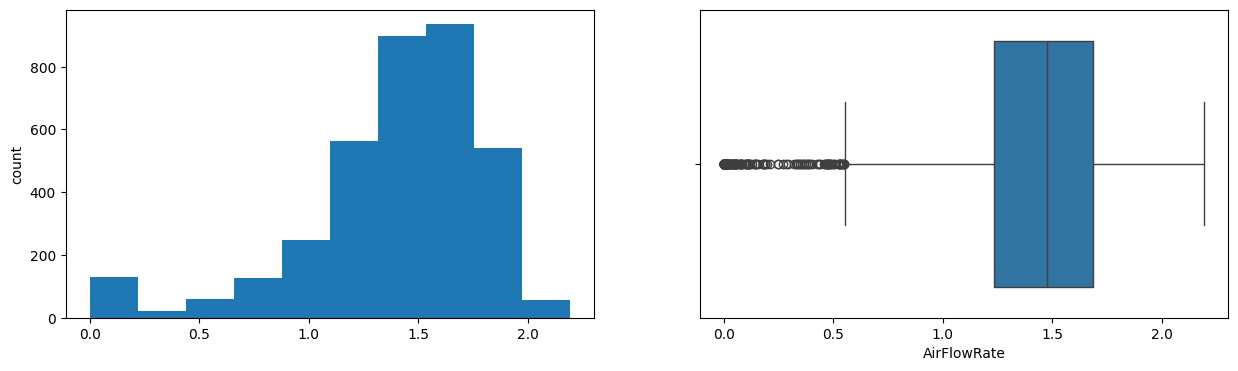

Vapor Temperature
Skew : 0.67


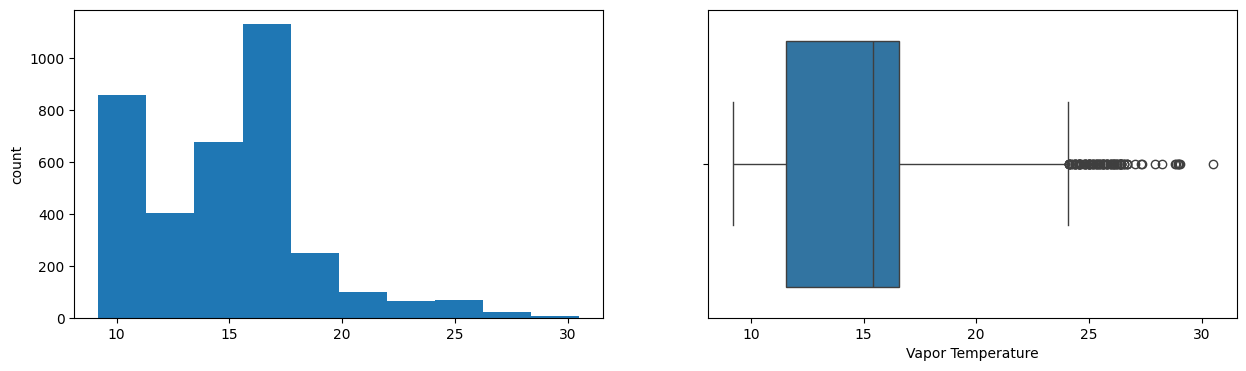

Liquid Temperature
Skew : 2.6


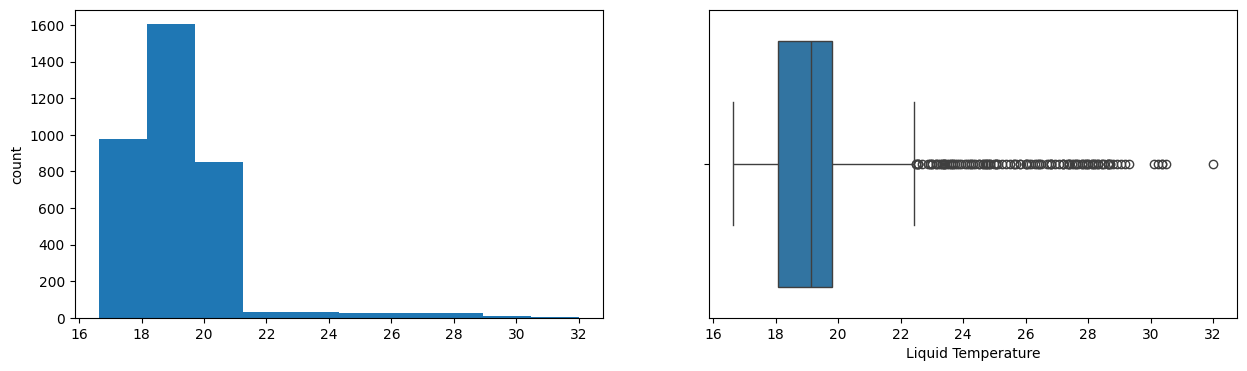

Current
Skew : -5.02


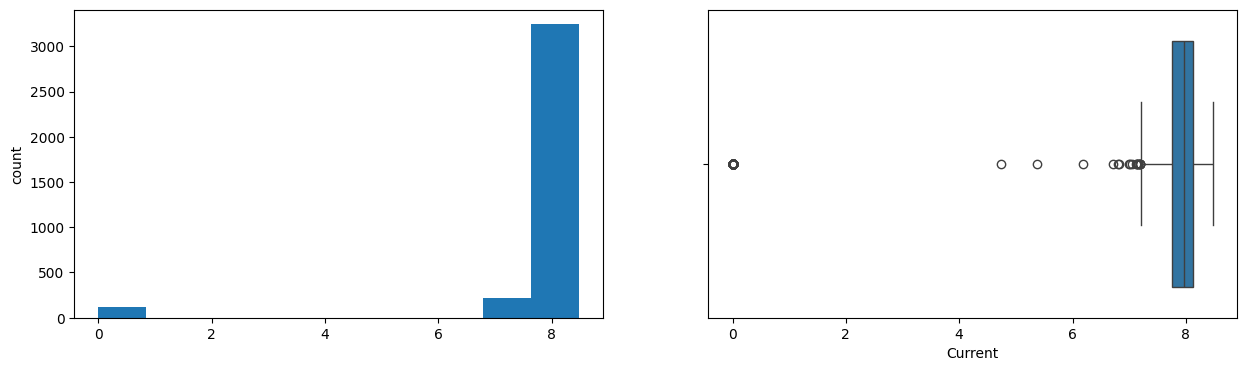

Power
Skew : -5.02


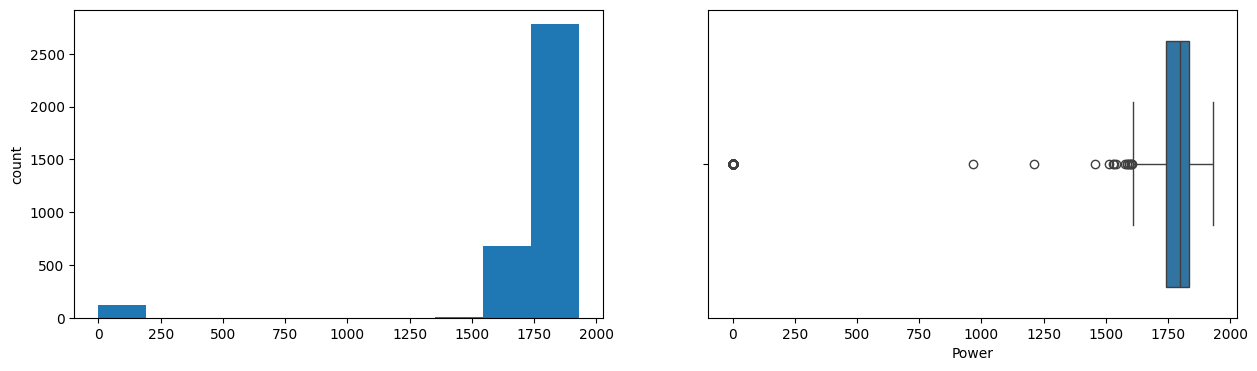

Voltage
Skew : -0.01


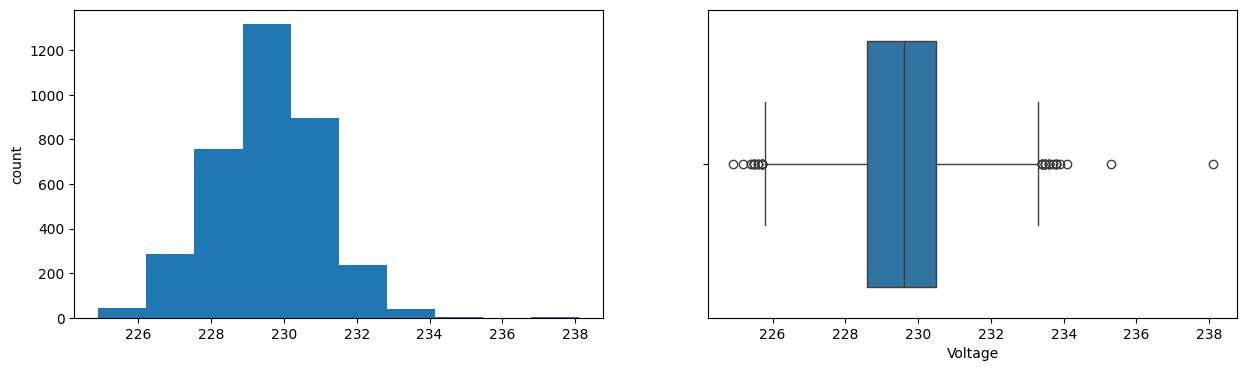

Outdoor Humidity
Skew : 2.36


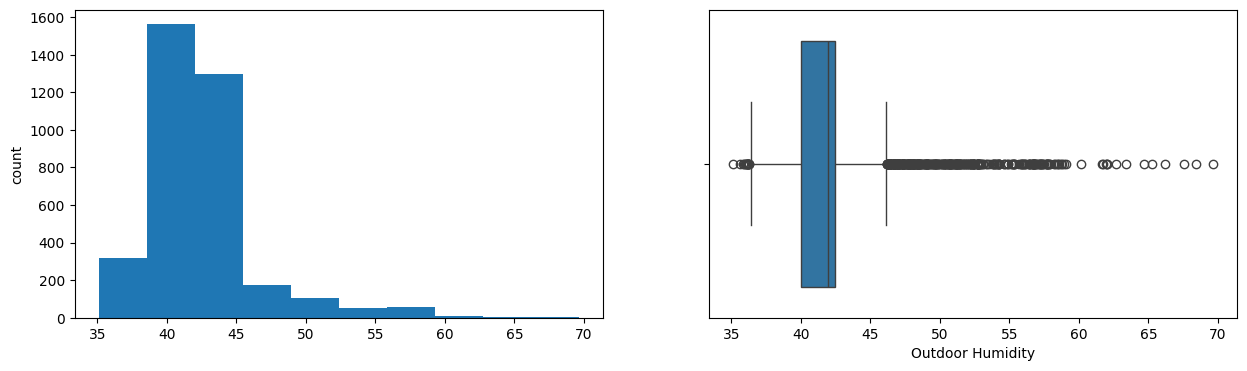

Outdoor Temperature
Skew : -1.88


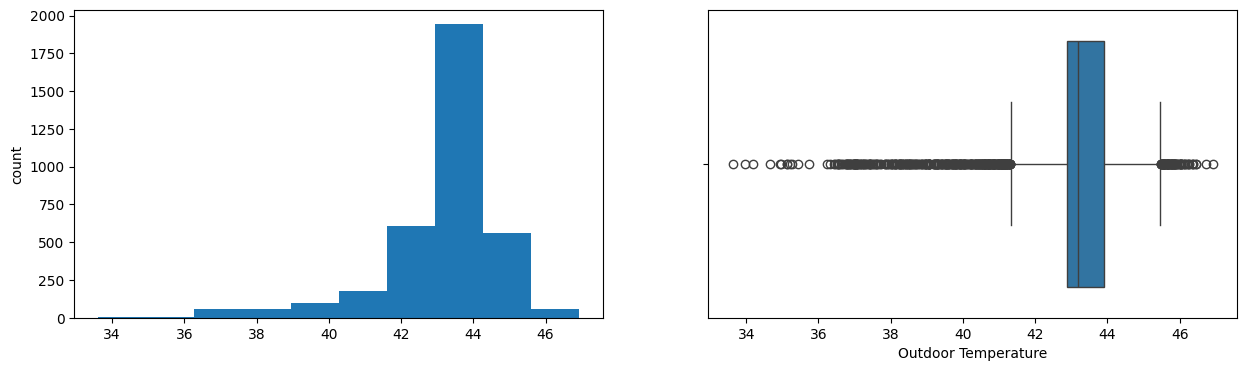

Indoor Temperature
Skew : 0.16


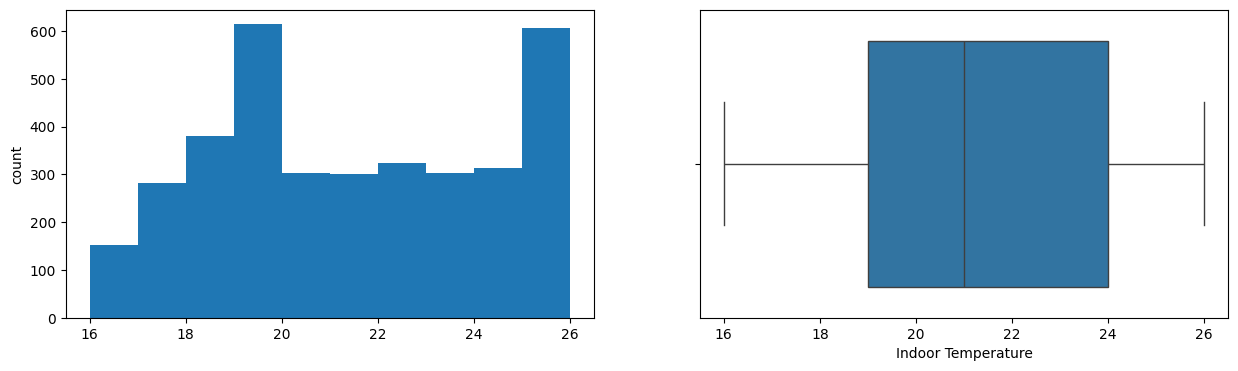

In [18]:
data_frame = df.drop(columns=['timestamp'])  


for col in numerical_columns:  
    print(col)  
    print('Skew :', round(df[col].skew(), 2))  
    plt.figure(figsize=(15, 4))  
    plt.subplot(1, 2, 1)  
    df[col].hist(grid=False)  
    plt.ylabel('count')  
    plt.subplot(1, 2, 2)  
    sns.boxplot(x=df[col])  
    plt.show()

Skewness describes the asymmetry of the distribution of values in a dataset. Helps in undestanding the shape of the distribution of each numerical variable. 

Positive skewness values pulling the mean to the right, while negative skewness vales pull the mean to the left. 

Power and current shows the same skewness.

Highly skewed parameters like Liquid Temperature, Outdoor Humidity, Current, and Power indicate potential outliers or anomalies in their distributions. 

This is important for anomaly detection because highly skewed distributions might reflect abnormal behavior under certain conditions.

Mildly skewed parameters like Vapor Temperature and AirFlowRate are closer to normal but still have some degree of imbalance that might indicate trends.

Voltage and Indoor Temperature, being nearly symmetrical, likely follow a more normal distribution, which could serve as baselines for comparison in anomaly detection.

Bivariate Analysis

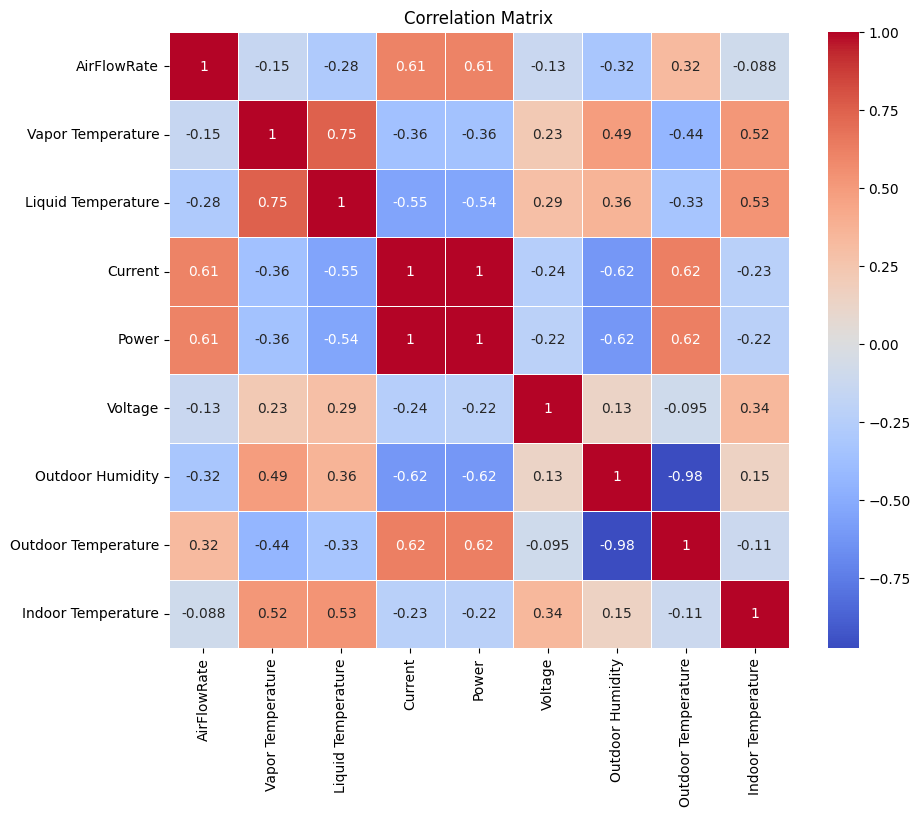

In [19]:
# Removing 'timestamp' column 
df_cleaned = df.select_dtypes(include=['number'])

# Calculating the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Insights:
There is a perfect correlation between Power and Current. This is expected as power is ususally calculated using current.

There is a strong correlation(0.75) between vapor temperature and liquid temperature of the refregirent. 

There is a strong negative correlation(-0.98) between outdoor temperature and outdoor humidity, which means when one increases, other one tends to decrease significantly. 

Between Airflow rate and power and current, there is a moderate correlation (0.61). Which means airflow rate is linked to power consumption and current.

There is a moderate correlation of around 0.5 of vapor and liquid temperatures on indoor temperature. 

Negative correlations around -0.4 to -0.5 suggest that increases in outdoor temperature are associated with decreases in vapor and liquid temperatures.



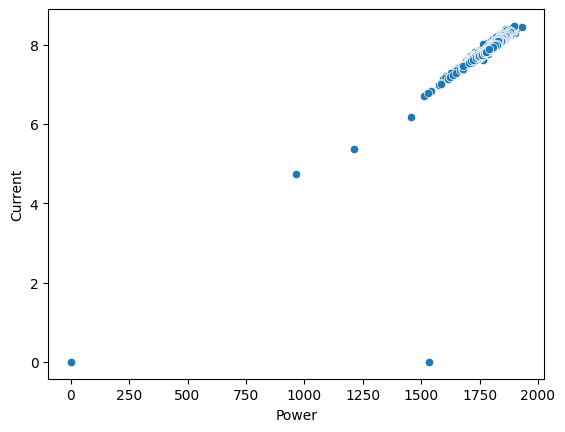

In [20]:
sns.scatterplot(x='Power', y='Current', data=df)
plt.show()

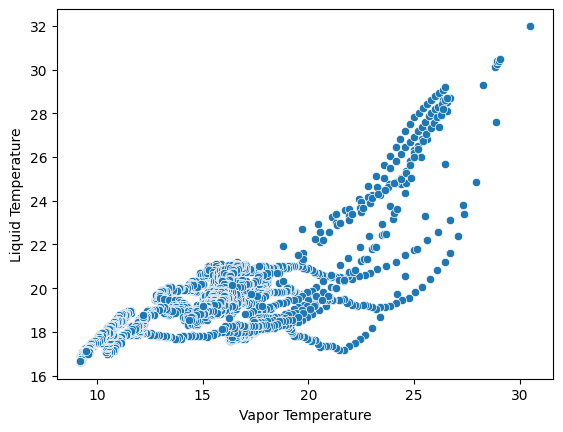

In [21]:
sns.scatterplot(x='Vapor Temperature', y='Liquid Temperature', data=df)
plt.show()

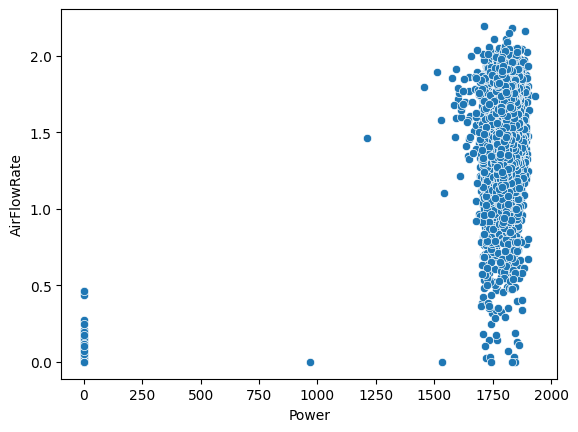

In [17]:
sns.scatterplot(x='Power', y='AirFlowRate', data=df)
plt.show()

Checking multicollinearity among the features

The following features should be examined for potential multicollinearity.Because when the features are highly correlated, it can lead to multicollinearity, where the model struggles to distinguish their individual effects. If two features are having a high VIF, we can consider removing one of them.

In [18]:
#Creating a dataframe from selected features
selected_features = df[['Power', 'Current', 'Outdoor Humidity', 'Outdoor Temperature', 'Vapor Temperature', 'Liquid Temperature']]

#Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(len(selected_features.columns))]

print(vif_data)

               Feature          VIF
0                Power  4272.968755
1              Current  4331.085636
2     Outdoor Humidity   112.502935
3  Outdoor Temperature   481.494479
4    Vapor Temperature    49.573192
5   Liquid Temperature   391.627414


Outlier Detection

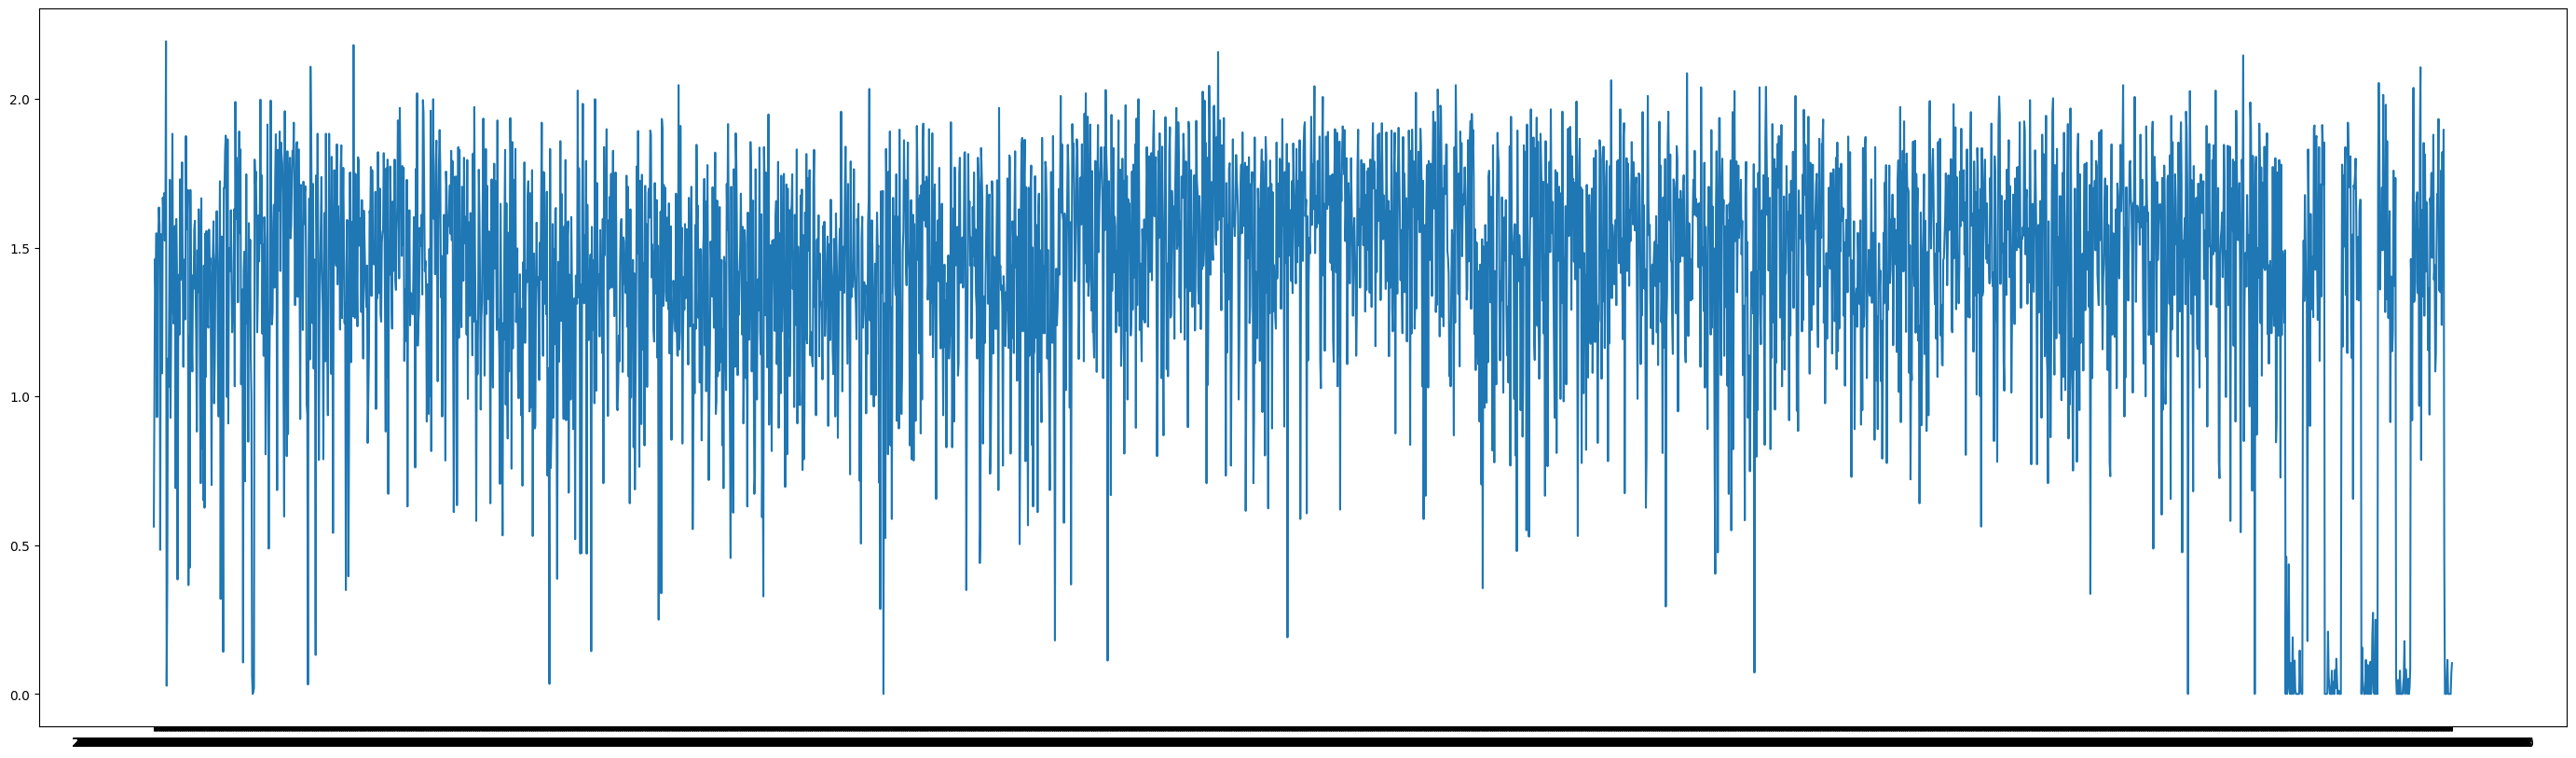

In [19]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['AirFlowRate'])
plt.show()

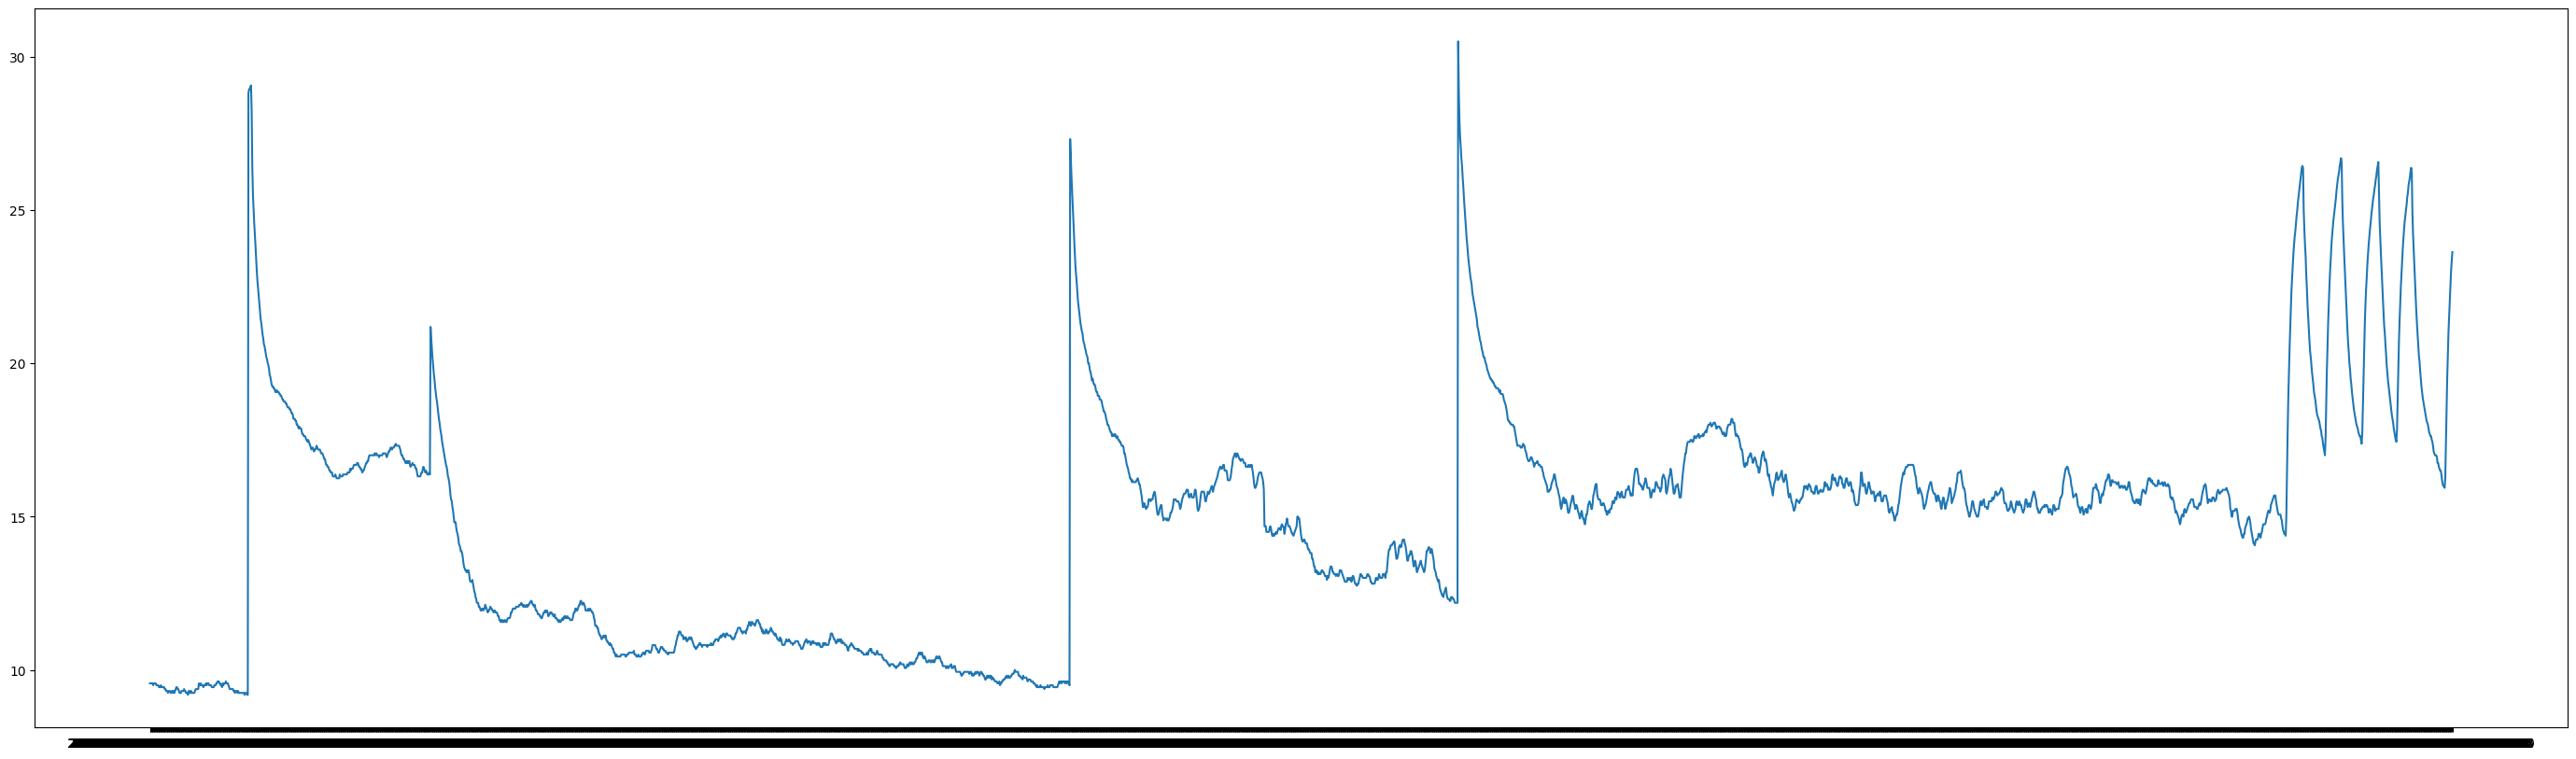

In [20]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Vapor Temperature'])
plt.show()

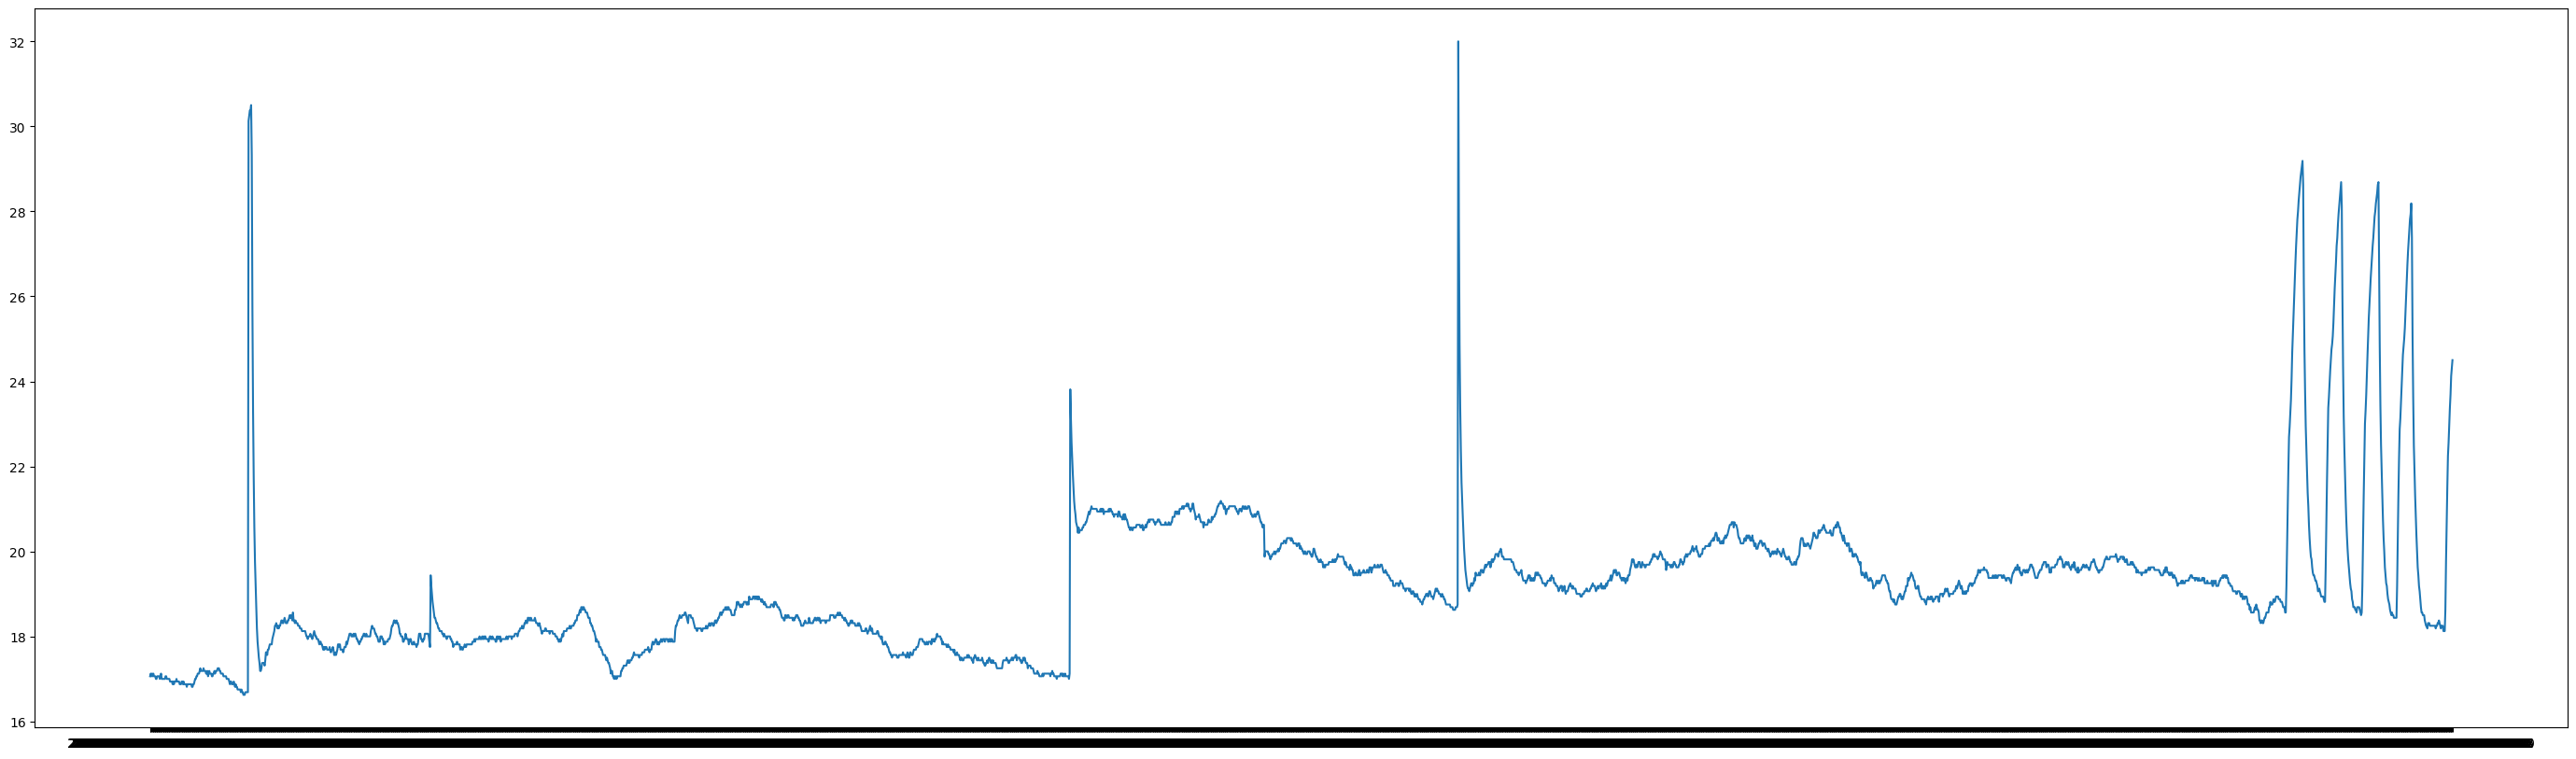

In [21]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Liquid Temperature'])
plt.show()

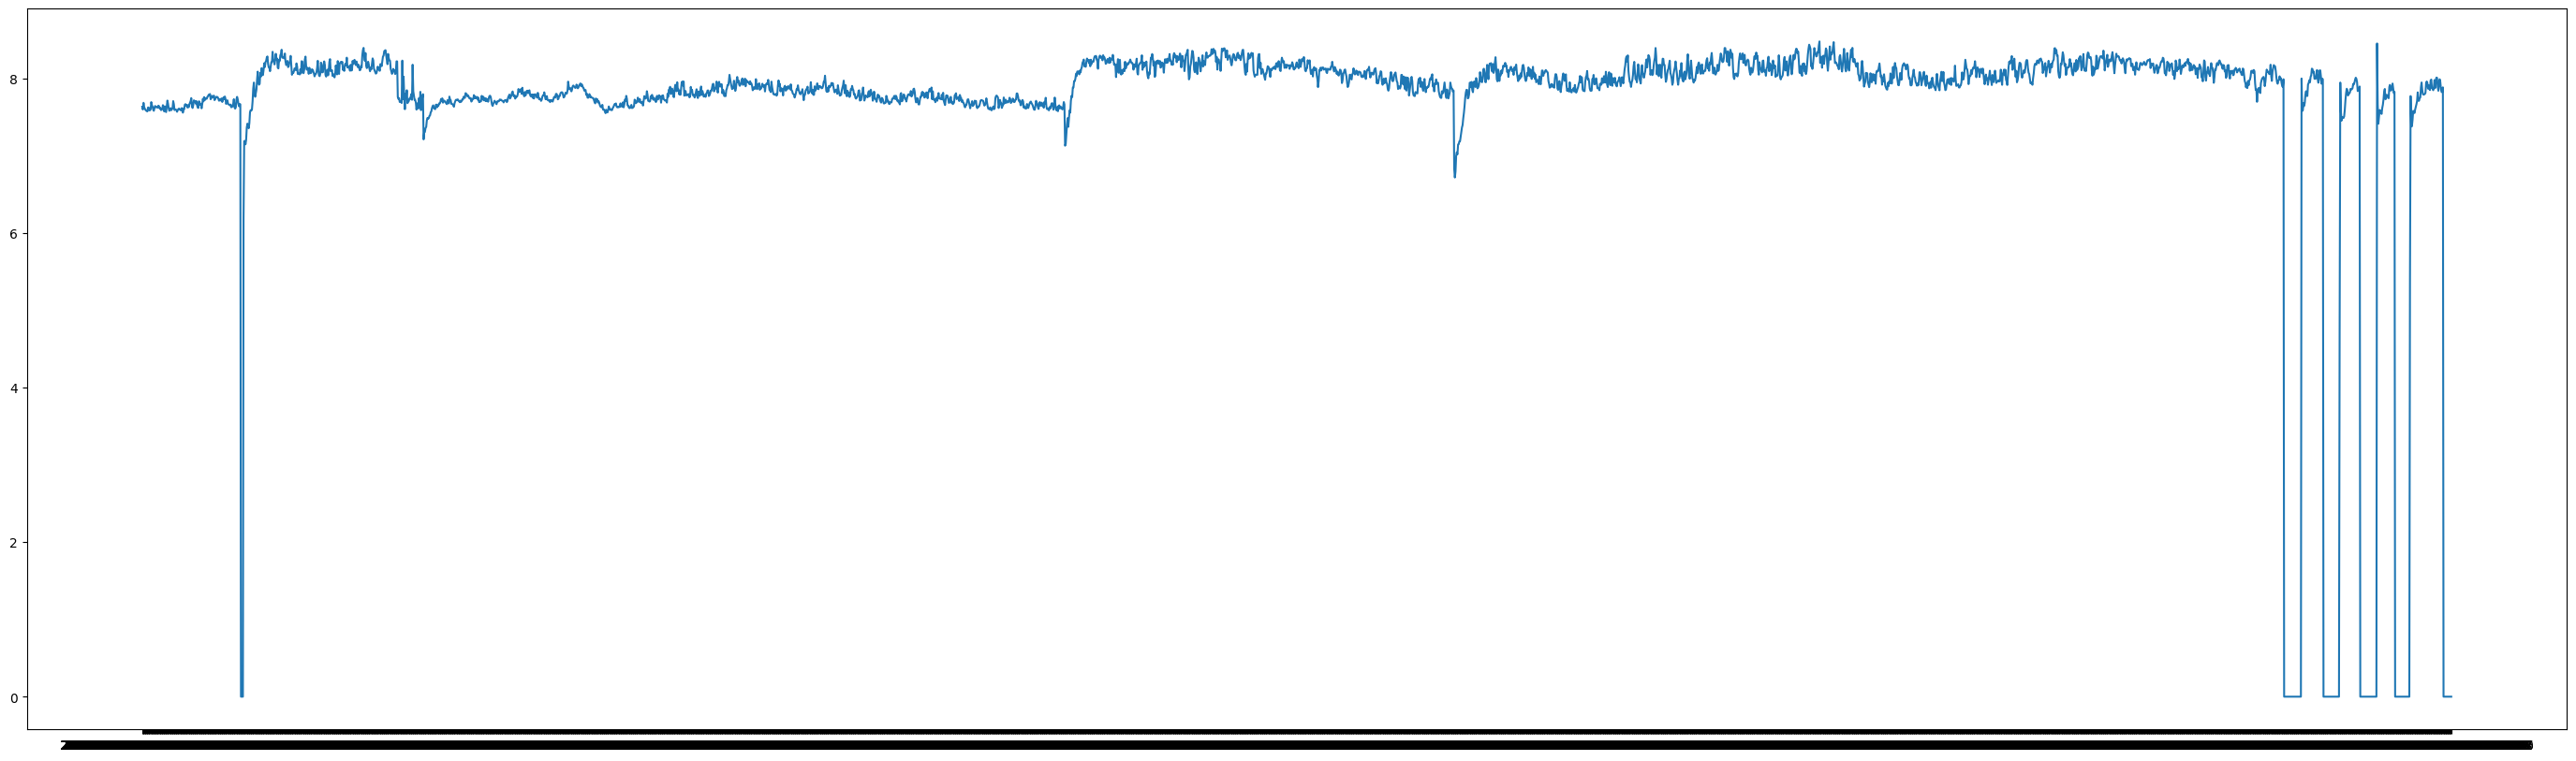

In [22]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Current'])
plt.show()

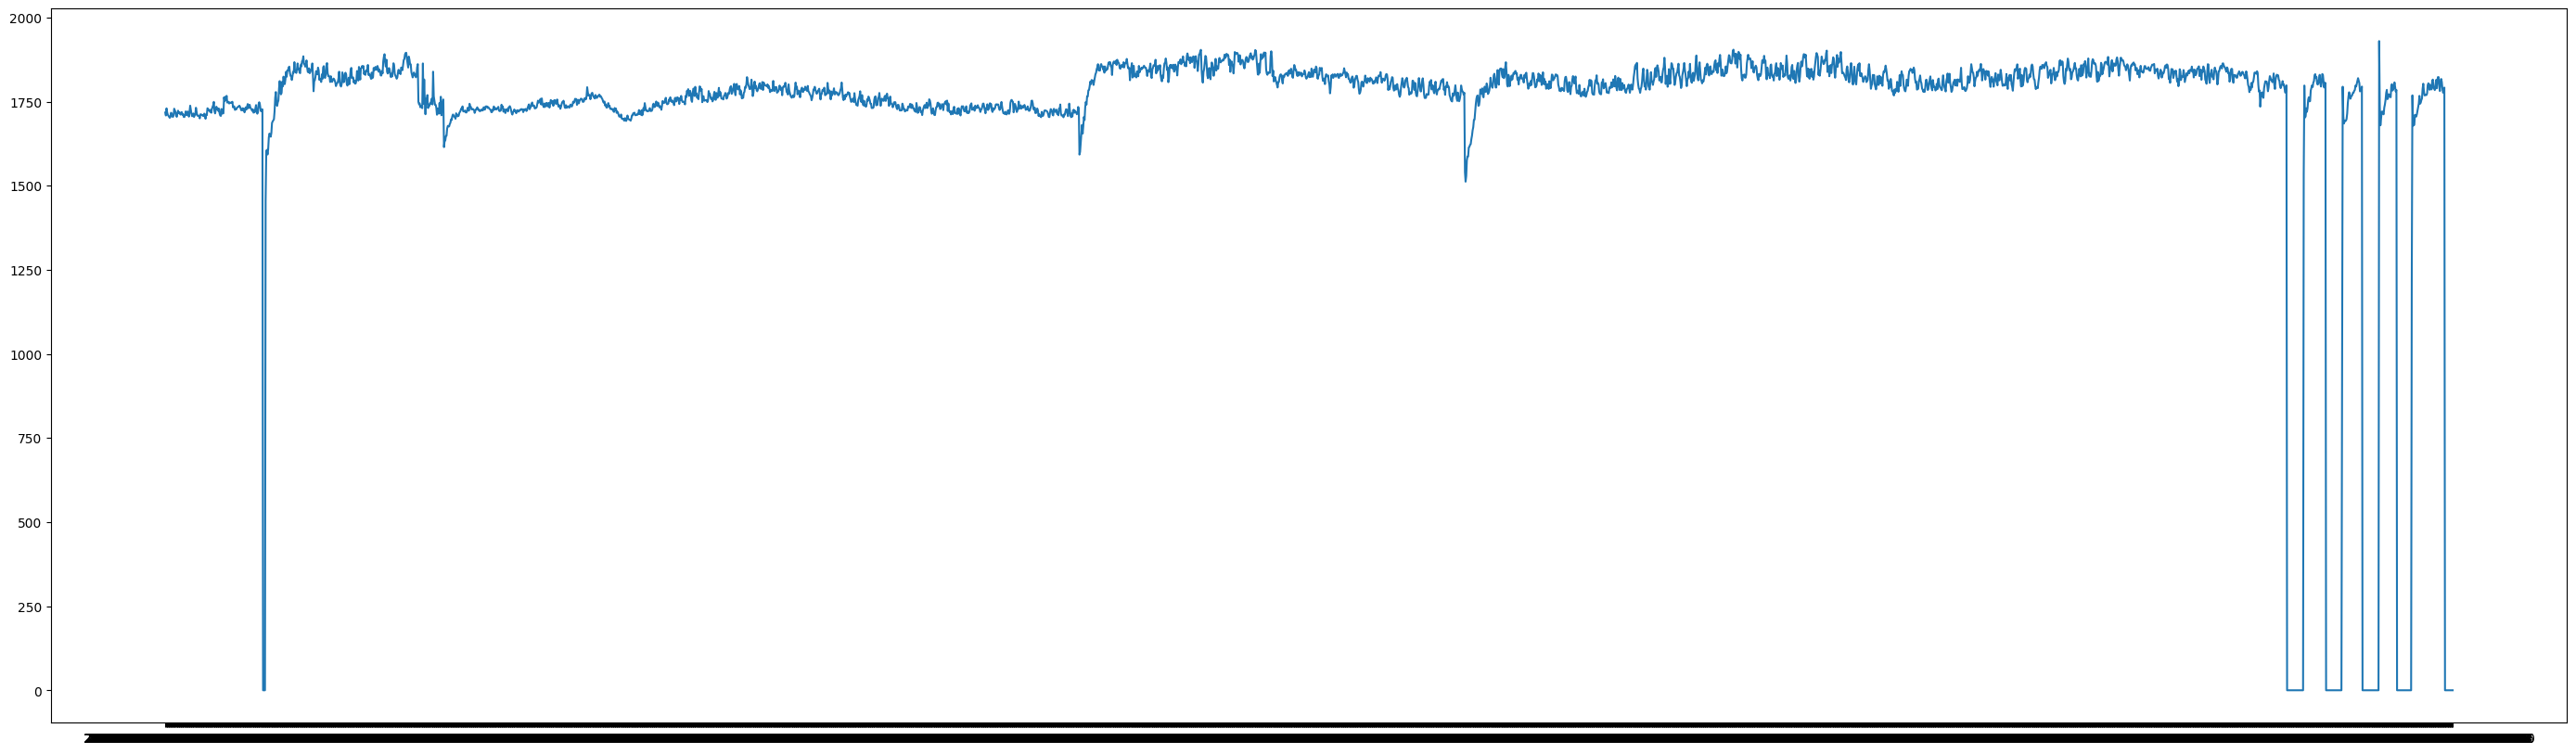

In [23]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Power'])
plt.show()

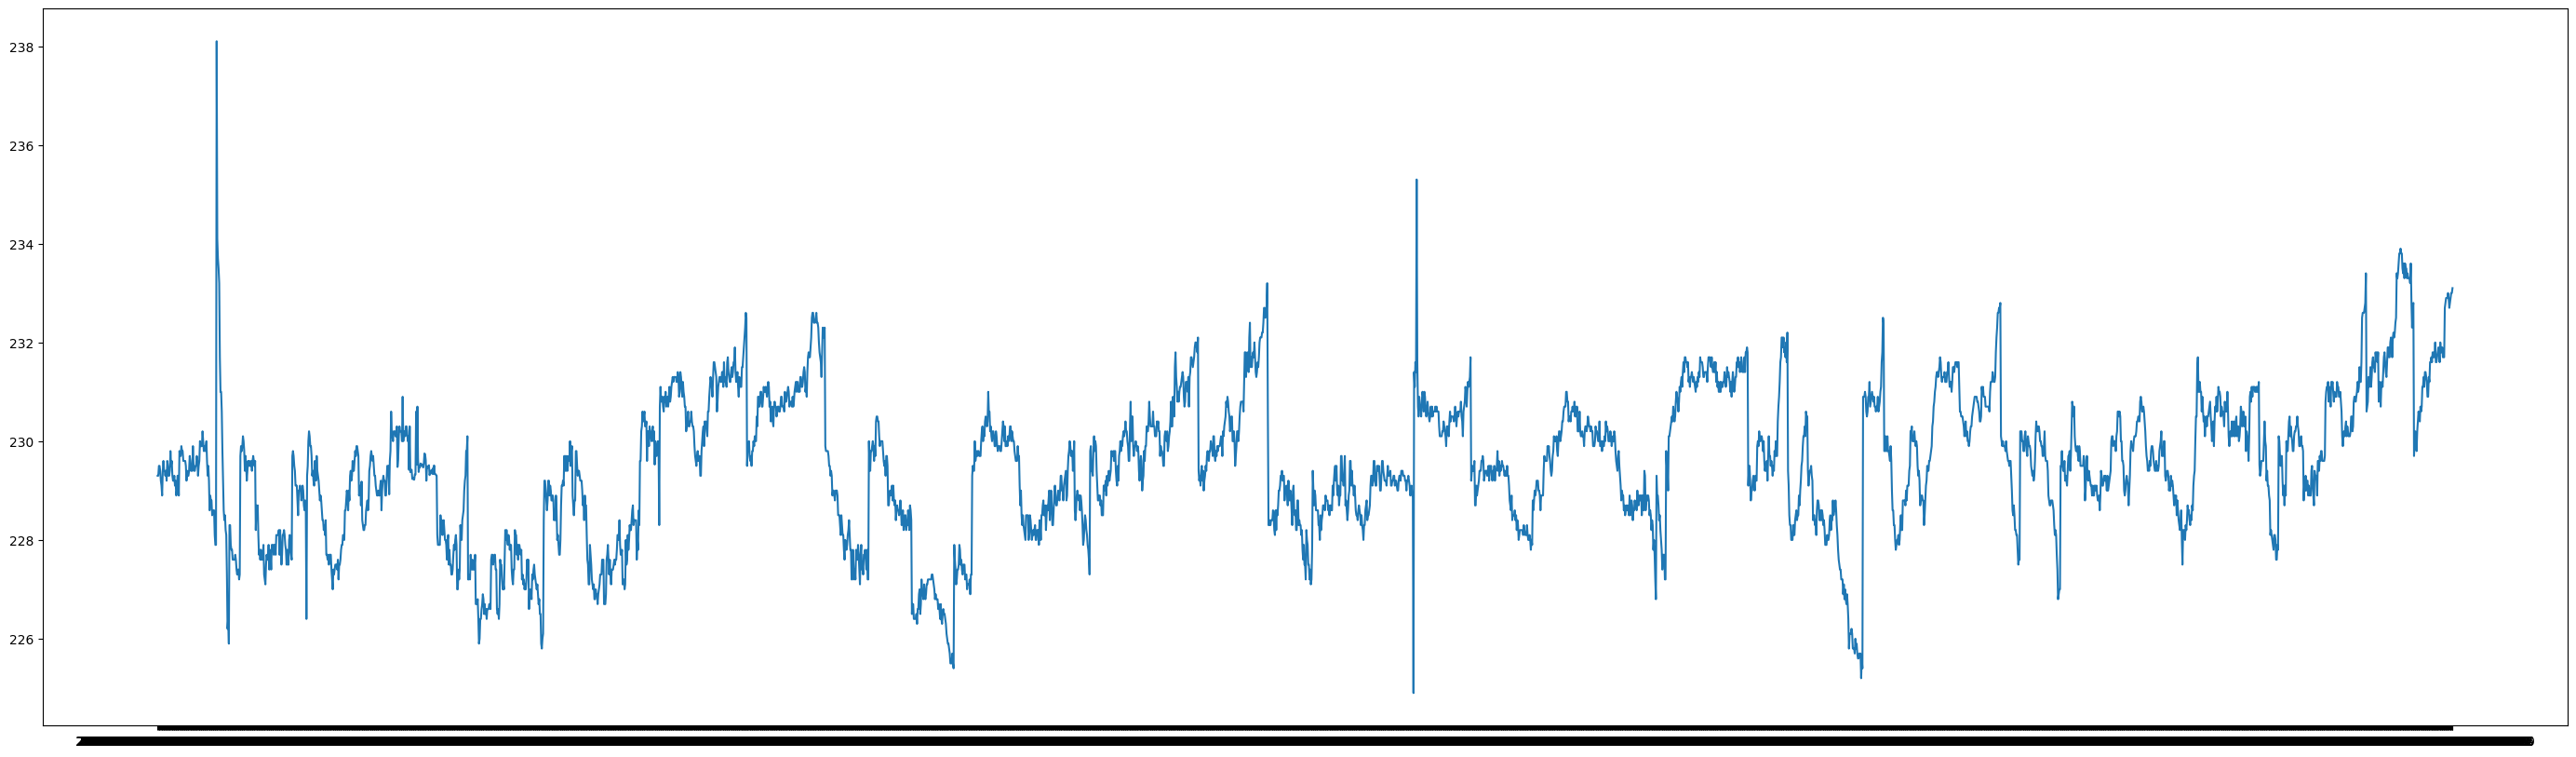

In [24]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Voltage'])
plt.show()

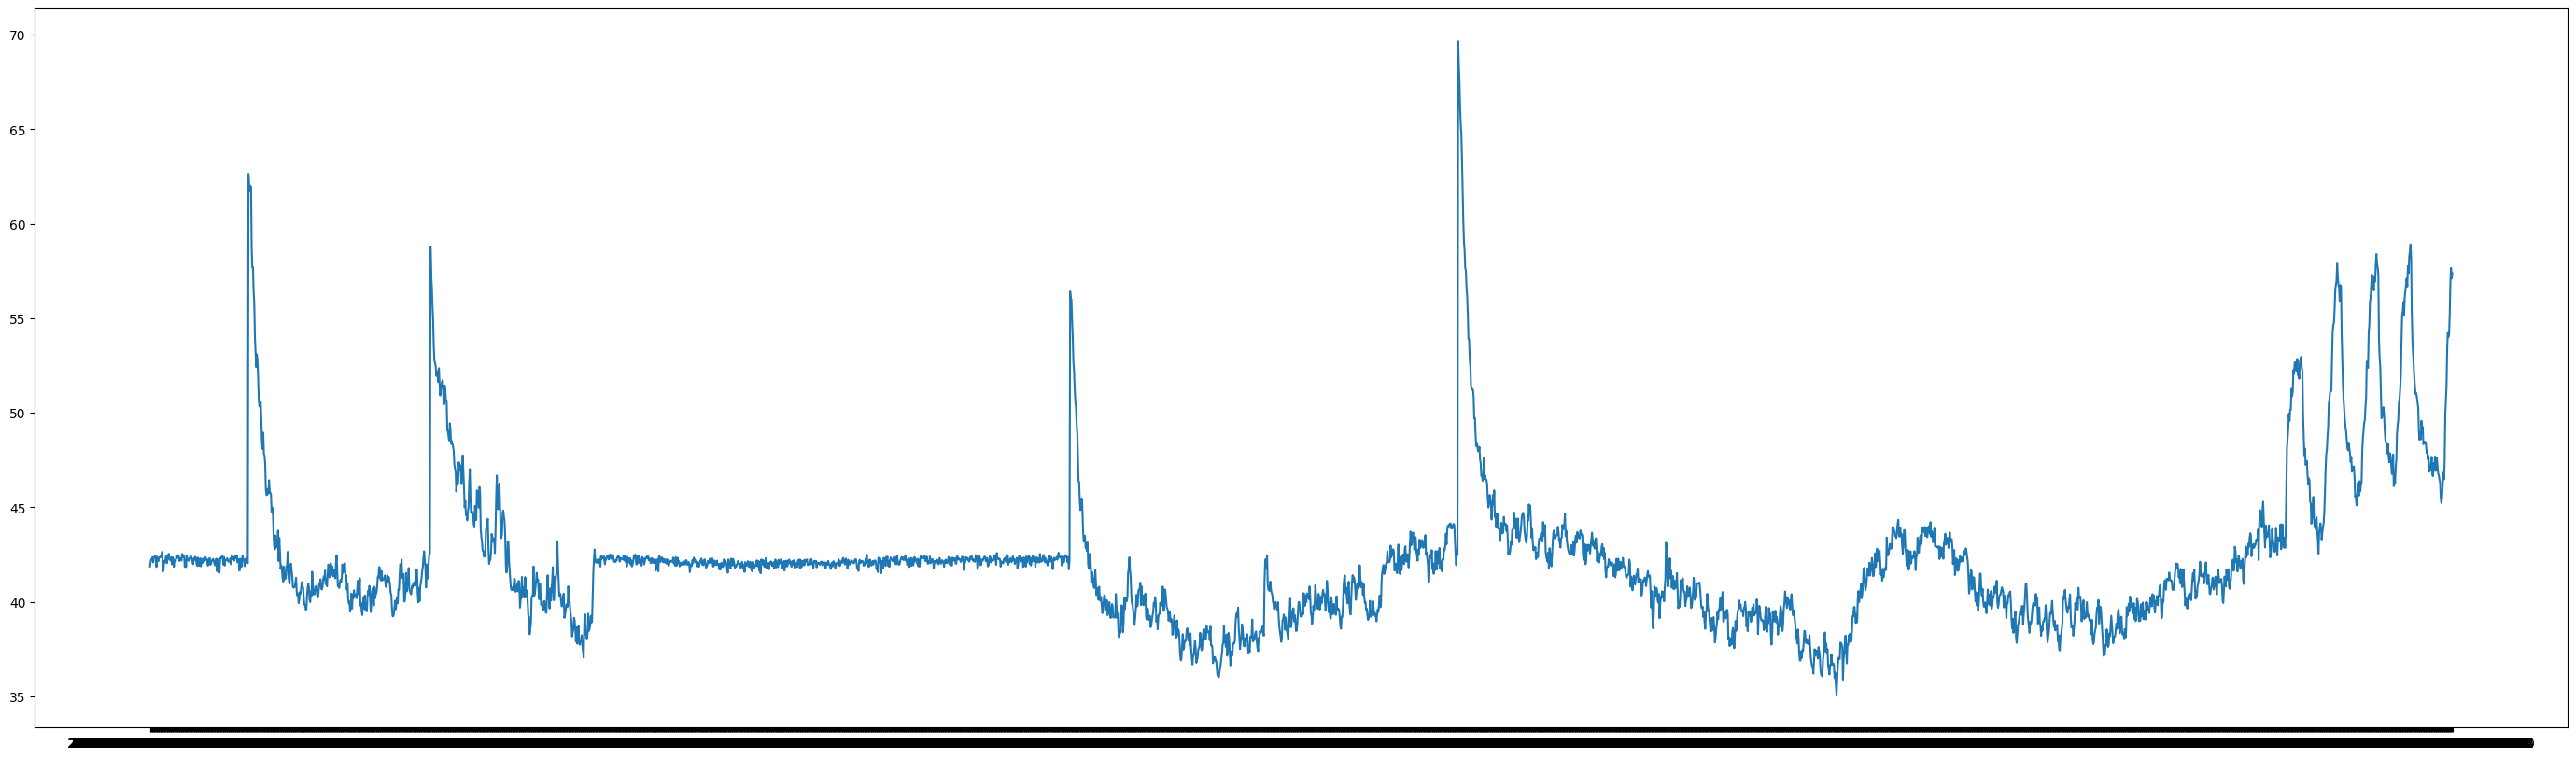

In [25]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Outdoor Humidity'])
plt.show()

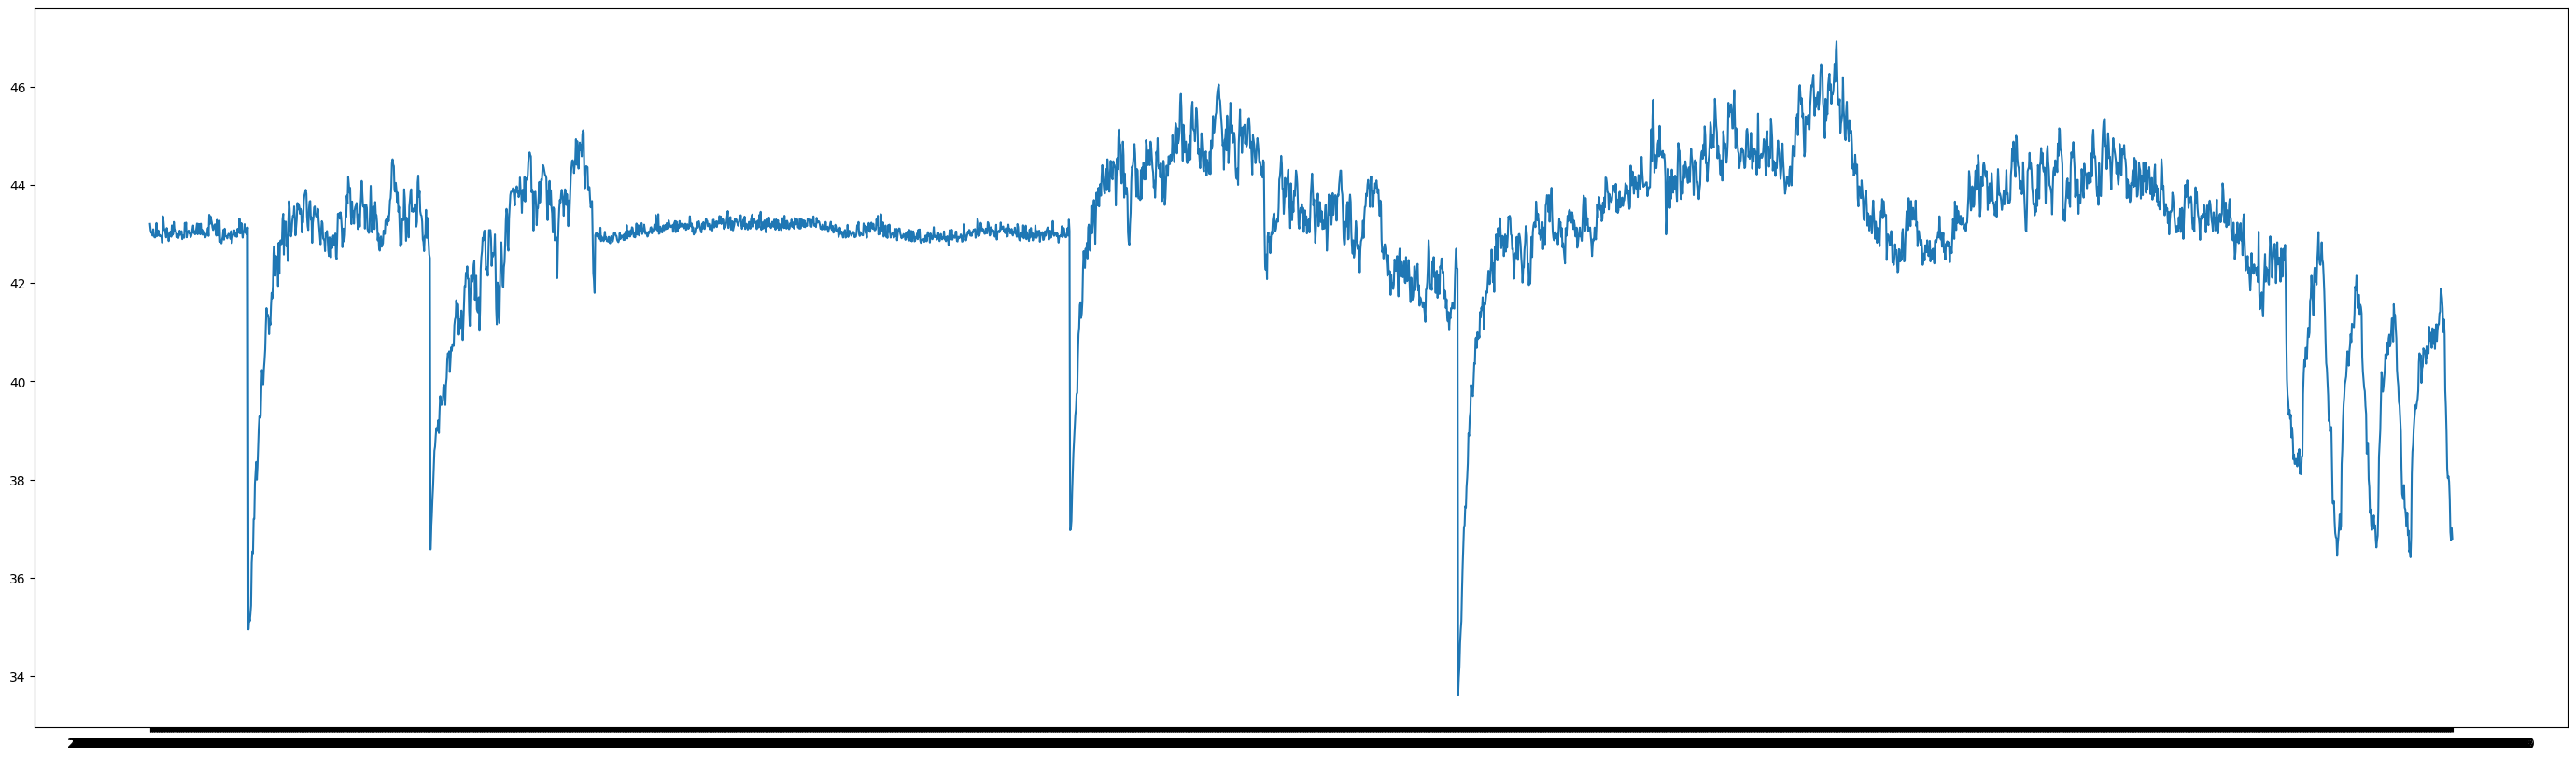

In [26]:
plt.figure(figsize=(35,10))
plt.plot(df['timestamp'], df['Outdoor Temperature'])
plt.show()

Normalization/Standardization

In [26]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns= numerical_columns)
scaled_data.head()


,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
3574,0.000000,0.604106,0.439024,0.0,0.0,0.598485,0.583373,0.299248,1.0
3575,0.000000,0.627566,0.459350,0.0,0.0,0.606060,0.630902,0.248872,1.0
3576,0.000000,0.648094,0.487805,0.0,0.0,0.613636,0.653423,0.236842,1.0
3577,0.031808,0.662757,0.500000,0.0,0.0,0.613636,0.637204,0.254887,1.0
3578,0.047233,0.677419,0.512195,0.0,0.0,0.621213,0.645172,0.239098,1.0


In [27]:
scaled_data.tail()

,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
3574,0.000000,0.604106,0.439024,0.0,0.0,0.598485,0.583373,0.299248,1.0
3575,0.000000,0.627566,0.459350,0.0,0.0,0.606060,0.630902,0.248872,1.0
3576,0.000000,0.648094,0.487805,0.0,0.0,0.613636,0.653423,0.236842,1.0
3577,0.031808,0.662757,0.500000,0.0,0.0,0.613636,0.637204,0.254887,1.0
3578,0.047233,0.677419,0.512195,0.0,0.0,0.621213,0.645172,0.239098,1.0
